In [17]:
#imports
import numba
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot

import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as pltcolors
from PIL import Image


### load train and test dataset + preprocess

In [18]:
# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

trainX, trainY, testX, testY = load_dataset()

In [19]:
# preprocess pixels
def preprocess_pixels(trainX, testX):
    # convert from integers to floats
    trainX_norm = trainX.astype('float32')
    testX_norm = testX.astype('float32')
    # normalize to range 0-1
    trainX_norm = trainX_norm / 255.0
    testX_norm = testX_norm / 255.0
    # return normalized images
    return trainX_norm, testX_norm

trainX, testX = preprocess_pixels(trainX, testX)
print("trainX shape ", trainX.shape, "testX shape ", testX.shape)

trainX shape  (60000, 28, 28, 1) testX shape  (10000, 28, 28, 1)


In [20]:
class myKmeans:
    def __init__(self, nb_centroids = 1, max_iter = 300, tol = 0.0001):
        self.nb_centroids = nb_centroids
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = []
        
    
    def fit(self, dataset, classes):
        #init of centroids
        get_ids = []
        while len(self.centroids) < self.nb_centroids:
            r = random.randint(0, len(dataset))
            if r in get_ids:
                continue
            get_ids.append(r)
            self.centroids.append(dataset[r])
        
        has_moved = True
        associate = [] 
        count = 0
        for iterate in range(self.max_iter):
            has_moved = False
            associate.clear()
            count += 1
            for element in dataset:
                val_closest = np.linalg.norm(element - self.centroids[0])
                id_closest = 0
                for i,centroid in enumerate(self.centroids):
                    val = np.linalg.norm(element - centroid)
                    if val <= val_closest:
                        val_closest = val
                        id_closest = i
                        
                associate.append(id_closest)

            for id_centroid,centroid in enumerate(self.centroids):
                new_centroid = np.zeros(centroid.shape)
                count = 0
                for id_element,id_closest_centroid in enumerate(associate):
                    if id_centroid == id_closest_centroid:
                        count+=1
                        new_centroid += dataset[id_element]
                
                if count == 0:
                  self.centroids[id_centroid] = dataset[random.randint(0, len(dataset))]
                else:
                  new_centroid = new_centroid / count
                
                diff = np.linalg.norm(new_centroid - centroid)
                if diff > self.tol: 
                    has_moved = True
                    
                self.centroids[id_centroid] = new_centroid 
            if has_moved == False:
              break

        print(f"###################\n# iter number {count} #\n###################")
        self.plot(associate, classes)
              
    
    def simple_encode(self, X):
        val_closest = np.linalg.norm(X - self.centroids[0])
        id_closest = 0
        for i,centroid in tqdm(enumerate(self.centroids)):
            val = np.linalg.norm(X - centroid)
            if val <= val_closest:
                val_closest = val
                id_closest = i
        return id_closest
    
    def one_hot_encode(self,X):
        liste = [0]*self.nb_centroids
        liste[self.simple_encode(X)] = 1
        return liste
    
    def simple_decode(self, X_encode):
        return self.centroids[X_encode]
    
    def one_hot_decode(self, X_encode):
        return self.centroids(X_encore.index(1))

    def plot(self, associate, classes):
      class0 = [0]*self.nb_centroids
      class1 = [0]*self.nb_centroids
      class2 = [0]*self.nb_centroids
      class3 = [0]*self.nb_centroids
      class4 = [0]*self.nb_centroids
      class5 = [0]*self.nb_centroids
      class6 = [0]*self.nb_centroids
      class7 = [0]*self.nb_centroids
      class8 = [0]*self.nb_centroids
      class9 = [0]*self.nb_centroids
      x_list = []

      for centroid in range(self.nb_centroids):
        x_list.append(centroid + 1)
        for img_id,centroid_id in enumerate(associate):
          if centroid_id == centroid:
            if np.where(classes[img_id] == 1.0)[0][0] == 0:
              class0[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 1:
              class1[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 2:
              class2[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 3:
              class3[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 4:
              class4[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 5:
              class5[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 6:
              class6[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 7:
              class7[centroid]+=1
            elif np.where(classes[img_id] == 1.0)[0][0] == 8:
              class8[centroid]+=1
            else:
              class9[centroid]+=1
              
      x = np.asarray(x_list)
      plt.figure(figsize=(20, 8))
      width = 0.09

      plt.bar(x-0.45, class1, width=0.09, color='blue', align='center',label="1")
      plt.bar(x-0.36, class2, width=0.09, color='orange', align='center',label="2")
      plt.bar(x-0.27, class3, width=0.09, color='green', align='center',label="3")
      plt.bar(x-0.18, class4, width=0.09, color='red', align='center',label="4")
      plt.bar(x-0.09, class5, width=0.09, color='purple', align='center',label="5")
      plt.bar(x, class6, width=0.09, color='brown', align='center',label="6")
      plt.bar(x+0.09, class7, width=0.09, color='pink', align='center',label="7")
      plt.bar(x+0.18, class8, width=0.09, color='grey', align='center',label="8")
      plt.bar(x+0.27, class9, width=0.09, color='olive', align='center',label="9")
      plt.bar(x+0.36, class0, width=0.09, color='cyan', align='center',label="0")
        
      plt.xlabel("id_centroid")
      plt.ylabel("number of data")
      plt.title("Number data per classes per centroids")

      plt.xticks(x + width/2, x)
      plt.legend()
        
      plt.show()


    def print_centroids_as_images(self):
      fig=plt.figure(figsize=(10, 10))
      columns = 10
      rows = int(self.nb_centroids / 10) + 1

      for id,i in enumerate(self.centroids):
        fig.add_subplot(rows, columns, id+1)       
        plt.imshow(testX[r].squeeze(2), cmap=plt.cm.binary)
        plt.imshow(i.squeeze(2), cmap=plt.cm.binary)
        plt.xlabel(id)

In [21]:
test1 = myKmeans(nb_centroids=2,tol=0.00001)
test2 = myKmeans(nb_centroids=4,tol=0.00001)
test3 = myKmeans(nb_centroids=6,tol=0.00001)
test4 = myKmeans(nb_centroids=8,tol=0.00001)
test5 = myKmeans(nb_centroids=10,max_iter=500,tol=0.00001)
test6 = myKmeans(nb_centroids=12,max_iter=500,tol=0.00001)
test7 = myKmeans(nb_centroids=15,max_iter=500,tol=0.00001)
test8 = myKmeans(nb_centroids=18,max_iter=500,tol=0.00001)
test9 = myKmeans(nb_centroids=20,max_iter=500,tol=0.00001)

###################
# iter number 37139 #
###################


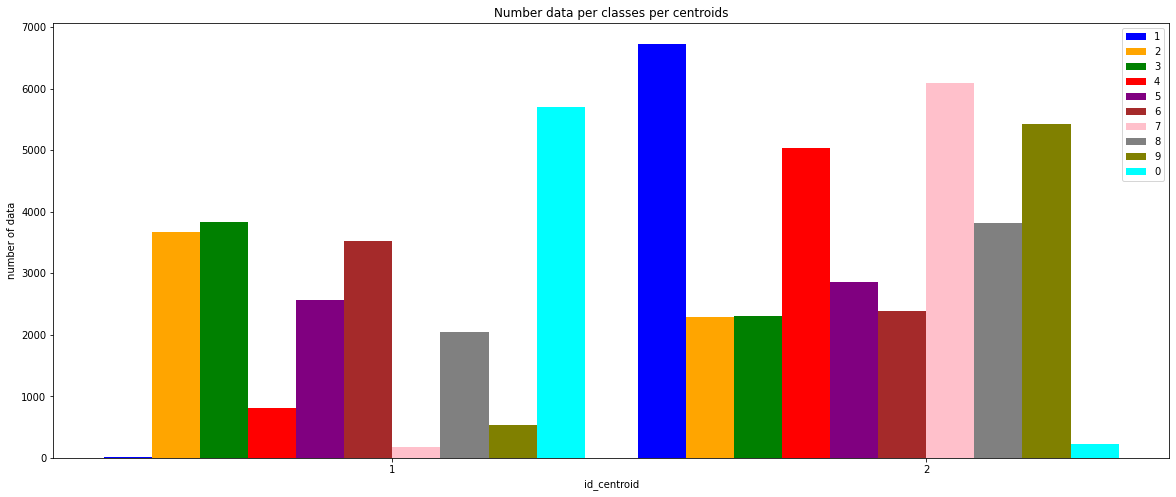

###################
# iter number 14661 #
###################


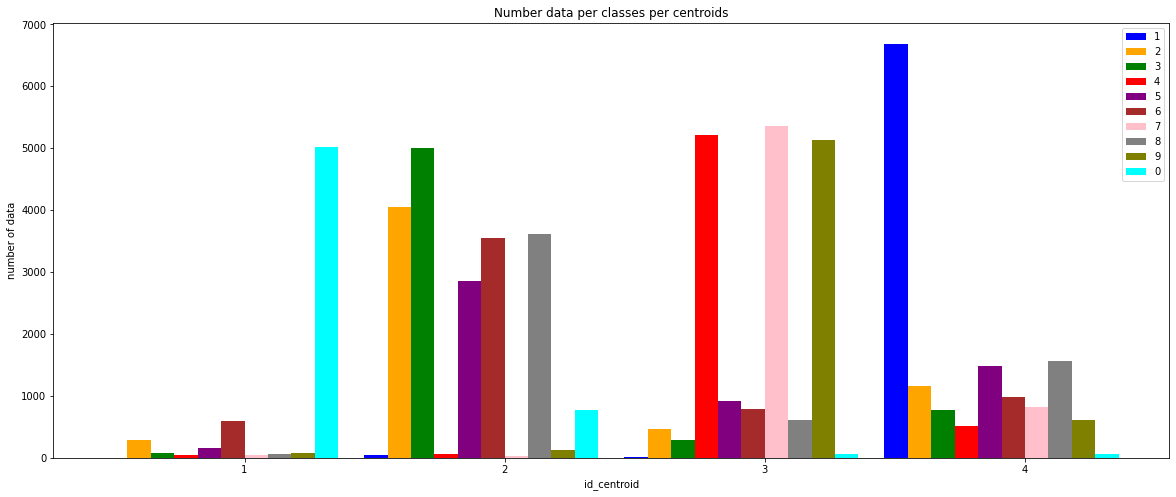

###################
# iter number 10352 #
###################


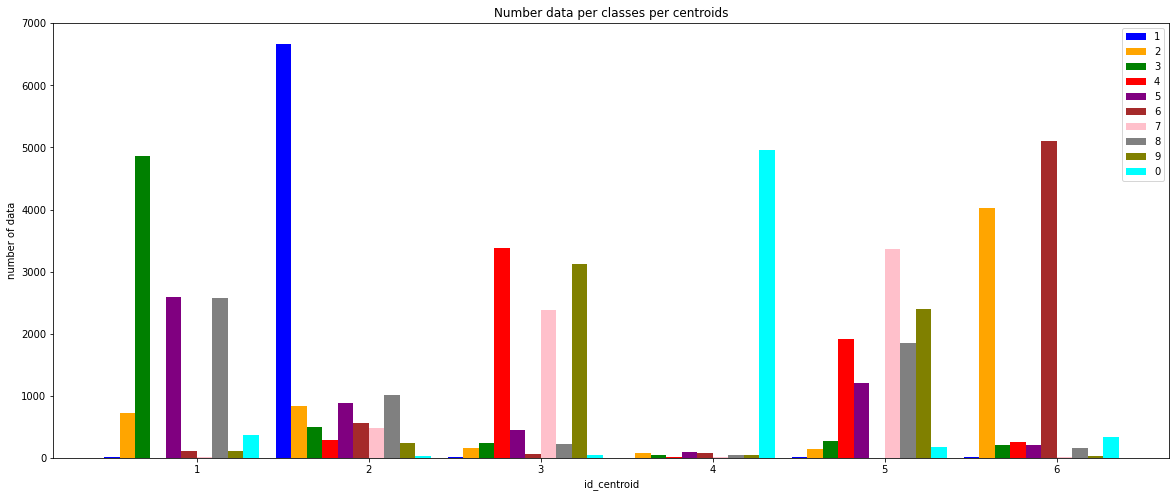

###################
# iter number 9602 #
###################


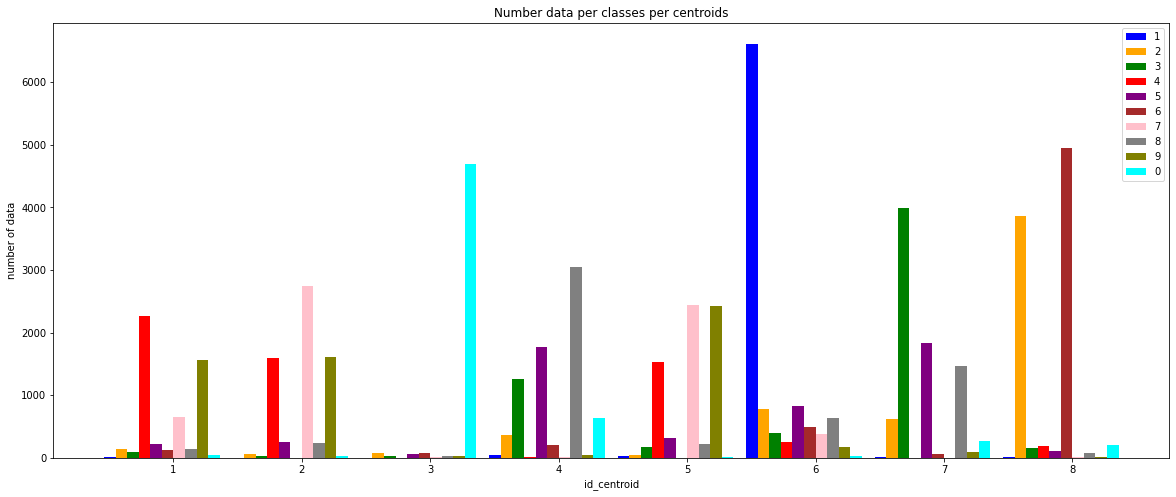

###################
# iter number 5297 #
###################


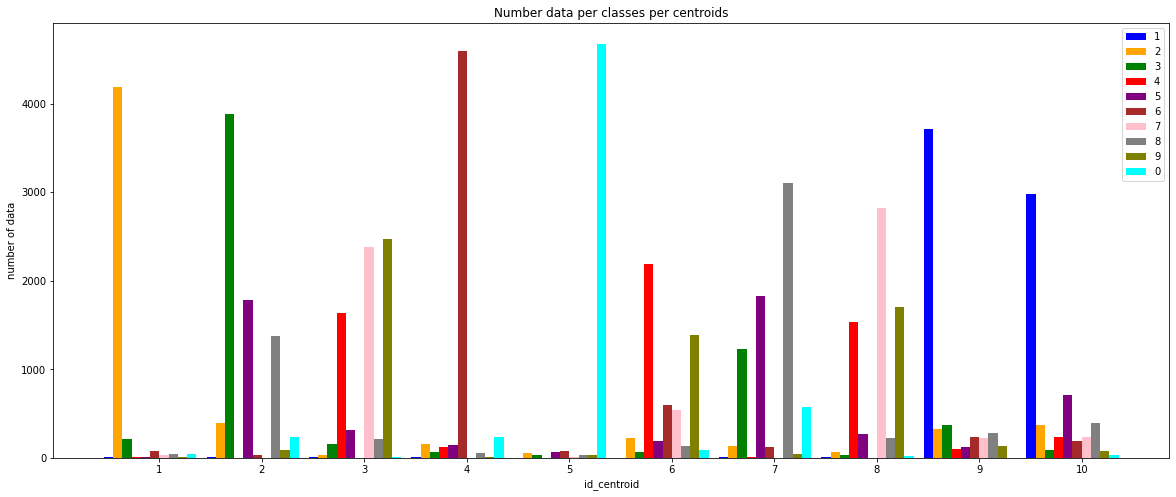

###################
# iter number 6796 #
###################


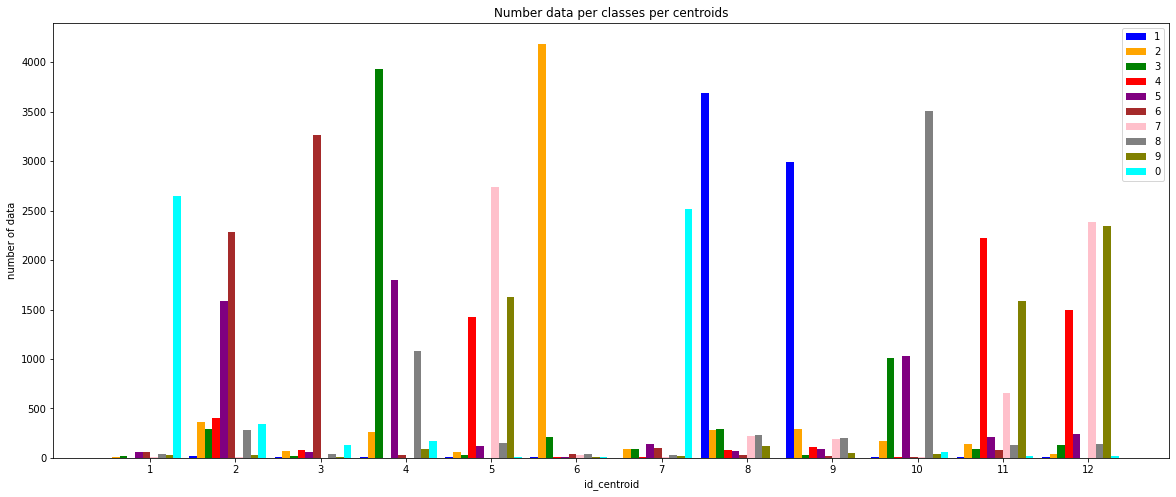

###################
# iter number 3494 #
###################


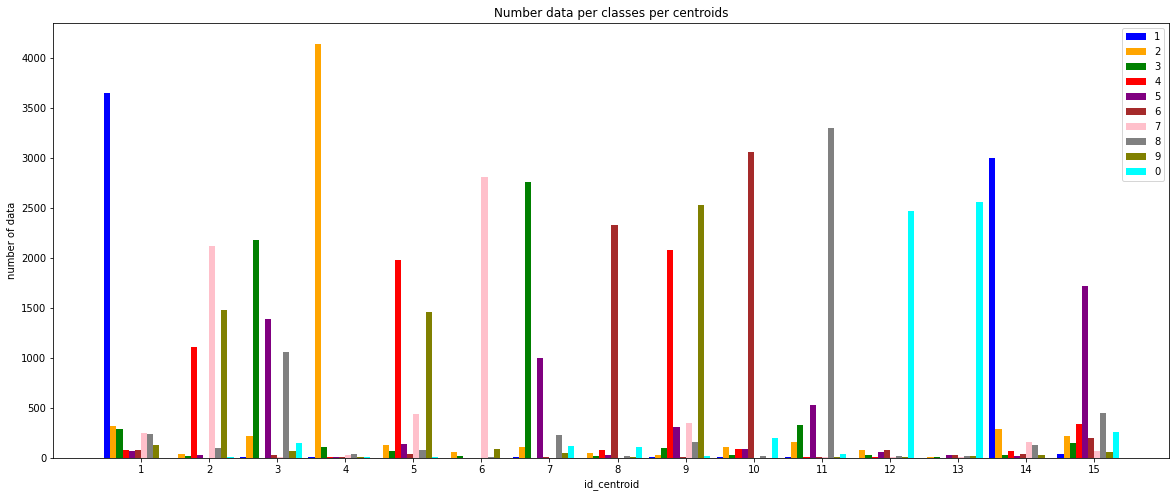

###################
# iter number 4110 #
###################


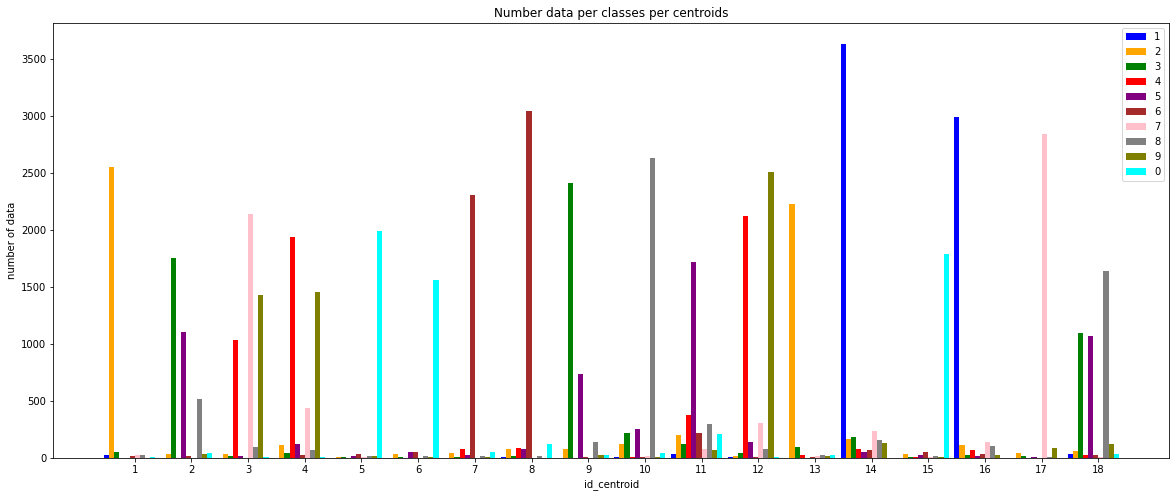

###################
# iter number 3379 #
###################


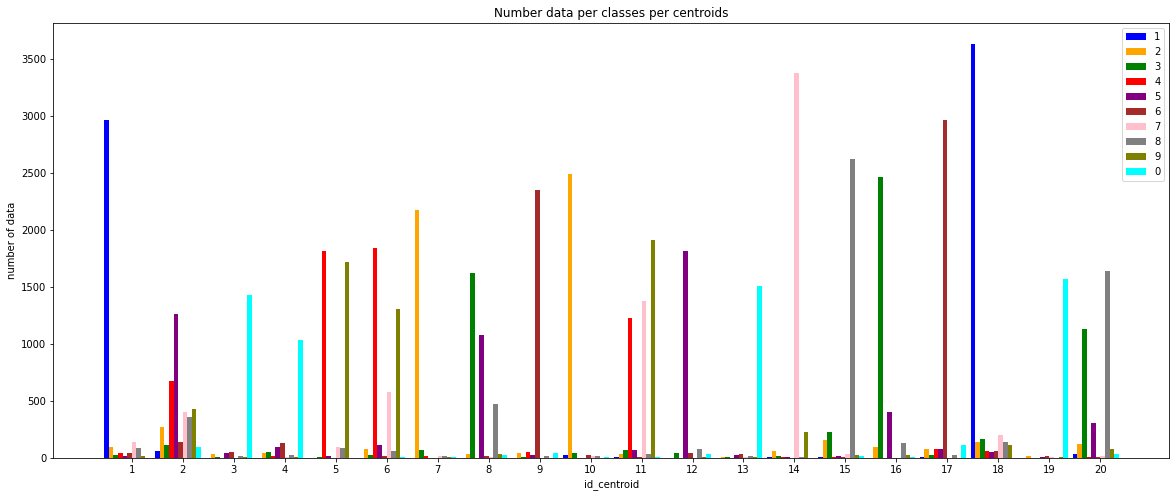

In [22]:
test1.fit(trainX,trainY)
test2.fit(trainX,trainY)
test3.fit(trainX,trainY)
test4.fit(trainX,trainY)
test5.fit(trainX,trainY)
test6.fit(trainX,trainY)
test7.fit(trainX,trainY)
test8.fit(trainX,trainY)
test9.fit(trainX,trainY)

2it [00:00, 2185.10it/s]
4it [00:00, 13378.96it/s]
6it [00:00, 1616.51it/s]
8it [00:00, 2071.39it/s]
10it [00:00, 5308.57it/s]
12it [00:00, 3984.14it/s]
15it [00:00, 7913.78it/s]
18it [00:00, 4821.04it/s]
20it [00:00, 7235.30it/s]


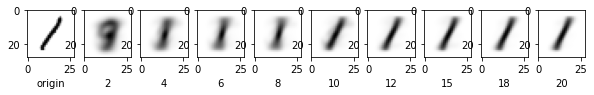

2it [00:00, 498.52it/s]
4it [00:00, 1176.52it/s]
6it [00:00, 2443.28it/s]
8it [00:00, 1952.43it/s]
10it [00:00, 4022.16it/s]
12it [00:00, 2479.64it/s]
15it [00:00, 7053.20it/s]
18it [00:00, 2332.18it/s]
20it [00:00, 5721.72it/s]


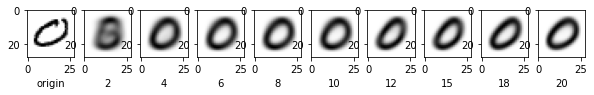

2it [00:00, 414.74it/s]
4it [00:00, 4054.43it/s]
6it [00:00, 2926.26it/s]
8it [00:00, 1939.45it/s]
10it [00:00, 2533.40it/s]
12it [00:00, 2115.84it/s]
15it [00:00, 3240.85it/s]
18it [00:00, 3827.89it/s]
20it [00:00, 3666.67it/s]


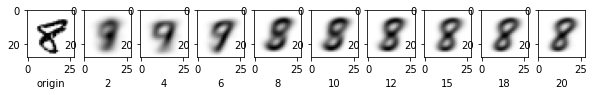

2it [00:00, 473.18it/s]
4it [00:00, 857.73it/s]
6it [00:00, 2151.84it/s]
8it [00:00, 1603.63it/s]
10it [00:00, 1954.11it/s]
12it [00:00, 4975.94it/s]
15it [00:00, 5065.58it/s]
18it [00:00, 12262.05it/s]
20it [00:00, 5874.79it/s]


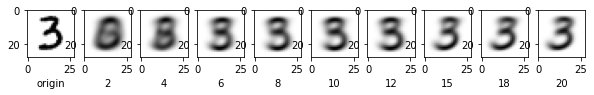

2it [00:00, 420.23it/s]
4it [00:00, 725.88it/s]
6it [00:00, 2034.26it/s]
8it [00:00, 7733.22it/s]
10it [00:00, 3798.50it/s]
12it [00:00, 5265.92it/s]
15it [00:00, 3279.53it/s]
18it [00:00, 29353.60it/s]
20it [00:00, 4774.94it/s]


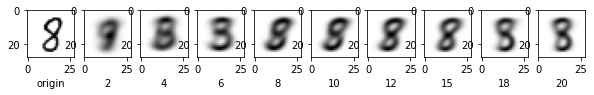

2it [00:00, 710.60it/s]
4it [00:00, 1588.90it/s]
6it [00:00, 574.10it/s]
8it [00:00, 2061.08it/s]
10it [00:00, 1710.70it/s]
12it [00:00, 3340.08it/s]
15it [00:00, 2451.38it/s]
18it [00:00, 4846.11it/s]
20it [00:00, 32177.25it/s]


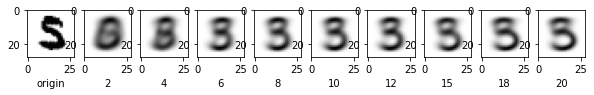

2it [00:00, 377.88it/s]
4it [00:00, 4381.62it/s]
6it [00:00, 5243.97it/s]
8it [00:00, 8188.00it/s]
10it [00:00, 7380.44it/s]
12it [00:00, 11105.84it/s]
15it [00:00, 4842.19it/s]
18it [00:00, 3729.38it/s]
20it [00:00, 3838.83it/s]


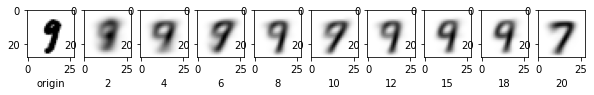

2it [00:00, 561.86it/s]
4it [00:00, 579.10it/s]
6it [00:00, 924.19it/s]
8it [00:00, 1781.30it/s]
10it [00:00, 19152.07it/s]
12it [00:00, 1588.35it/s]
15it [00:00, 2062.84it/s]
18it [00:00, 8413.85it/s]
20it [00:00, 5701.88it/s]


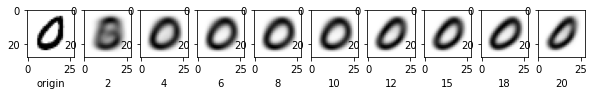

2it [00:00, 961.45it/s]
4it [00:00, 615.41it/s]
6it [00:00, 775.50it/s]
8it [00:00, 1481.24it/s]
10it [00:00, 1975.28it/s]
12it [00:00, 8107.55it/s]
15it [00:00, 7660.36it/s]
18it [00:00, 3496.55it/s]
20it [00:00, 6311.97it/s]


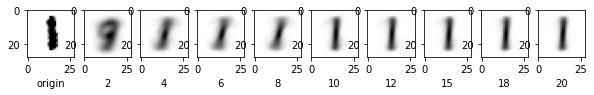

2it [00:00, 1267.54it/s]
4it [00:00, 1388.27it/s]
6it [00:00, 2812.77it/s]
8it [00:00, 16602.89it/s]
10it [00:00, 5415.50it/s]
12it [00:00, 22221.48it/s]
15it [00:00, 3846.57it/s]
18it [00:00, 21411.65it/s]
20it [00:00, 7641.29it/s]


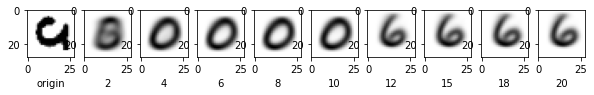

In [23]:
for i in range(10):
  fig=plt.figure(figsize=(10, 10))
  columns = 10
  rows = 1

  r = random.randint(0, len(testX))

  fig.add_subplot(rows, columns, 1) 
  plt.imshow(testX[r].squeeze(2), cmap=plt.cm.binary) # image orginal
  plt.xlabel("origin")

  fig.add_subplot(rows, columns, 2)
  plt.imshow(test1.simple_decode(test1.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test1.nb_centroids)

  fig.add_subplot(rows, columns, 3)
  plt.imshow(test2.simple_decode(test2.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test2.nb_centroids)

  fig.add_subplot(rows, columns, 4)
  plt.imshow(test3.simple_decode(test3.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test3.nb_centroids)

  fig.add_subplot(rows, columns, 5)
  plt.imshow(test4.simple_decode(test4.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test4.nb_centroids)

  fig.add_subplot(rows, columns, 6)
  plt.imshow(test5.simple_decode(test5.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test5.nb_centroids)

  fig.add_subplot(rows, columns, 7)
  plt.imshow(test6.simple_decode(test6.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test6.nb_centroids)
  
  fig.add_subplot(rows, columns, 8)
  plt.imshow(test7.simple_decode(test7.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test7.nb_centroids)
  
  fig.add_subplot(rows, columns, 9)
  plt.imshow(test8.simple_decode(test8.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test8.nb_centroids)
  
  fig.add_subplot(rows, columns, 10)
  plt.imshow(test9.simple_decode(test9.simple_encode(testX[r])).squeeze(2), cmap=plt.cm.binary)
  plt.xlabel(test9.nb_centroids)

  plt.show()